In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
hidden_layer_sizes = [790, 1024, 4000]
best_f1_score = 0
best_hidden_layer_size = 0
f1_scores = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=(size,), learning_rate_init=0.21, max_iter=1000, random_state=42)

    # Perform a 3-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_macro')
    avg_f1_score = np.mean(scores)
    f1_scores.append(avg_f1_score)
    print(f'Average F1-score for {size} nodes: {avg_f1_score}')

    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_hidden_layer_size = size

print(f'Best number of nodes in the hidden layer: {best_hidden_layer_size}')

/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Average F1-score for 790 nodes: 0.9625257814164838
Average F1-score for 1024 nodes: 0.963154778096373
Average F1-score for 4000 nodes: 0.9616555799140976
Best number of nodes in the hidden layer: 1024


In [6]:
# Test the model
y_pred = model.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average="macro")
print(f'Test F1-score: {test_f1}')


# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print(f'Train Accuracy: {train_accuracy}')

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

Test F1-score: 0.9653265952694795
Train Accuracy: 0.994125
Test Accuracy: 0.9655714285714285


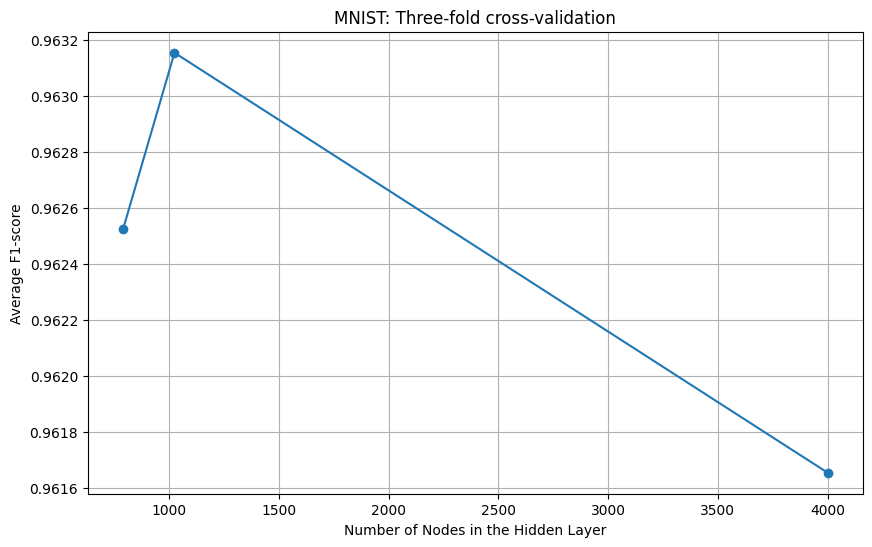

In [2]:
# Plot the F1-scores vs number of nodes in the hidden layer
plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes, f1_scores, marker='o')
plt.title('MNIST: Three-fold cross-validation')
plt.xlabel('Number of Nodes in the Hidden Layer')
plt.ylabel('Average F1-score')
plt.grid(True)
plt.show()

/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/l

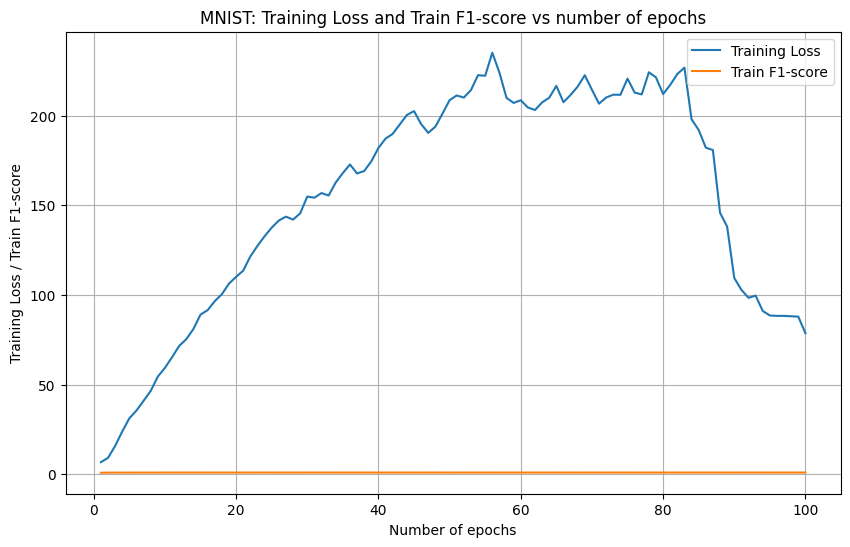

In [3]:
# Initialize lists to store the training loss and F1-score at each epoch
train_loss = []
train_f1 = []

# Train the model with the best number of nodes in the hidden layer
model = MLPClassifier(hidden_layer_sizes=(best_hidden_layer_size,), learning_rate_init=0.21, max_iter=1, warm_start=True, random_state=42)

# We will manually implement the epochs in order to store the training loss and F1-score at each epoch
for epoch in range(100):  # Reduced number of epochs to 100
    model.fit(X_train, y_train)
    
    # Calculate the training loss and F1-score at this epoch
    train_loss.append(model.loss_)
    y_pred_train = model.predict(X_train)
    train_f1.append(f1_score(y_train, y_pred_train, average="macro"))

# Plot the training loss and F1-score vs number of epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_loss, label='Training Loss')  # Adjusted range to match reduced number of epochs
plt.plot(range(1, 101), train_f1, label='Train F1-score')  # Adjusted range to match reduced number of epochs
plt.title('MNIST: Training Loss and Train F1-score vs number of epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Training Loss / Train F1-score')
plt.legend()
plt.grid(True)
plt.show()